<h3>Порівняння двох середніх. t-критерій Стьюдента</h3>

t-критерій Стьюдента - загальна назва для статистичних тестів, у яких статистика критерію має розподіл Стьюдента. Найчастіше t-критерії застосовуються для перевірки рівності середніх значень у двох вибірках. Нульова гіпотеза передбачає, що середні рівні (заперечення цього припущення називають гіпотезою зсуву). Для цього критерію необхідно, щоб вихідні дані мали нормальний розподіл.

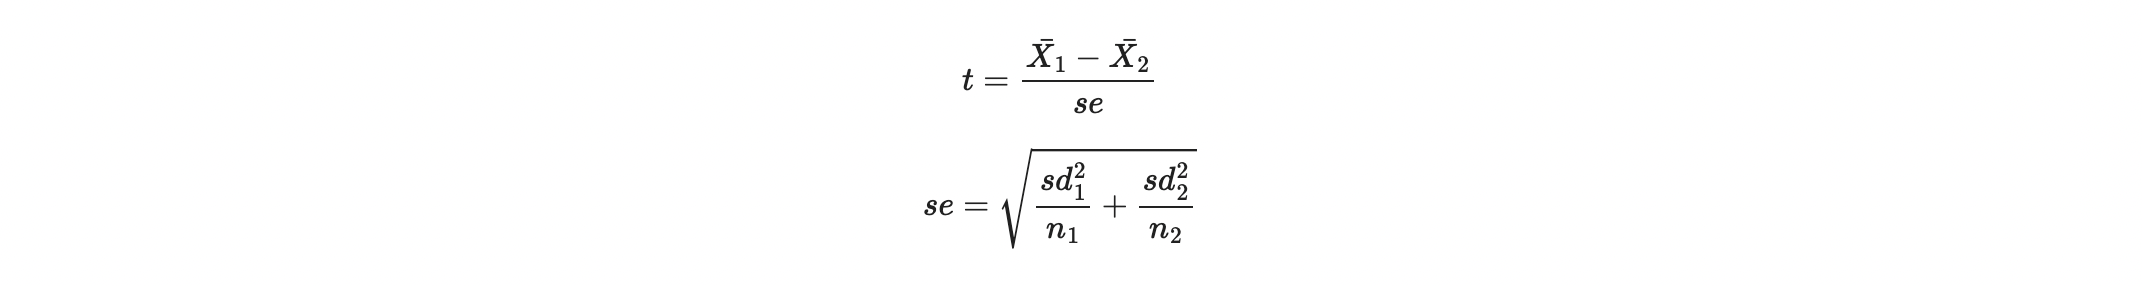

Звідки береться така формула для se?

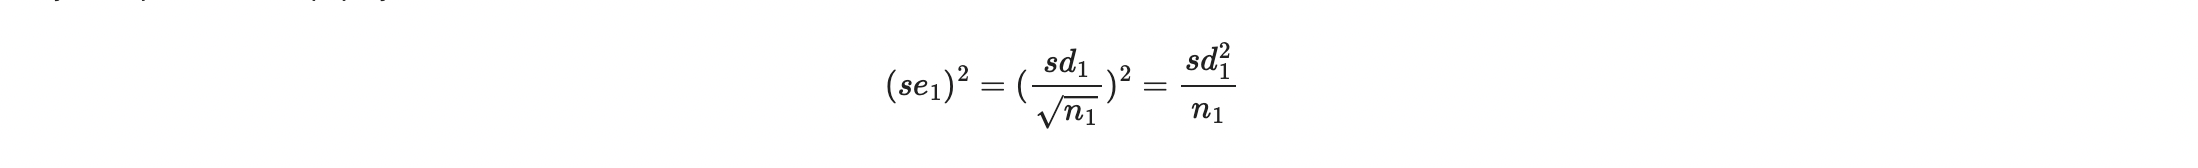

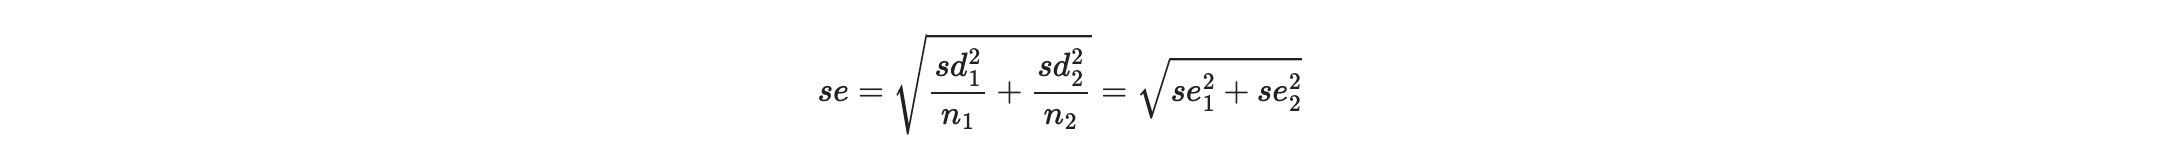

причому відповідь питанням, чому правильно це рівність, у властивості дисперсії: дисперсія суми незалежних випадкових величин дорівнює сумі їх дисперсій. а відхилення – це корінь із дисперсії. звідси ваша остання формула

<h3>Приклади застосування t-критерій Стьюдента</h3>

<b>Приклад 1.</b> Перша вибірка – це пацієнти, яких лікували препаратом А. Друга вибірка – пацієнти, яких лікували препаратом Б. Значення у вибірках – це деяка характеристика ефективності лікування (рівень метаболіту в крові, температура через три дні після початку лікування, термін одужання, число ліжко-днів, і т.д.) Потрібно з'ясувати, чи є значну відмінність ефективності препаратів А і Б, чи відмінності є суто випадковими і пояснюються «природною» дисперсією обраної характеристики.

<b>Приклад 2.</b> Перша вибірка – це значення деякої характеристики стану пацієнтів, які записані до лікування. Друга вибірка — це значення тієї ж характеристики стану тих пацієнтів, записаних після лікування. Обсяги обох вибірок мають збігатися; більше, порядок елементів (у разі пацієнтів) у вибірках також має збігатися. Такі вибірки називаються зв'язковими. Потрібно з'ясувати, чи є значна відмінність у стані пацієнтів до та після лікування, чи відмінності чисто випадкові.

<b>Приклад 3.</b> Перша вибірка – це поля, оброблені агротехнічним методом А. Друга вибірка – поля, оброблені агротехнічним методом Б. Значення у вибірках – це врожайність. Потрібно з'ясувати, чи один із методів ефективніший за інший, чи відмінності врожайності обумовлені випадковими факторами.

<b>Приклад 4.</b> Перша вибірка – це дні, коли у супермаркеті проходила промо-акція типу А (червоні цінники зі знижкою). Друга вибірка – дні промо-акції типу Б (кожна п'ята пачка безкоштовно). Значення у вибірках - це показник ефективності промо-акції (обсяг продажів, або виторг у гривняї). Потрібно з'ясувати, який із типів промо-акції ефективніший.

<h3>Приклади</h3>

In [4]:
# імпортуємо необхідні бібліотеки
import pandas as pd
from scipy.stats import t
import matplotlib.pyplot as plt
import numpy as np

array1 = np.array([84.7, 105.0, 98.9, 97.9, 108.7, 81.3, 99.4, 89.4, 93.0,
                   119.3, 99.2, 99.4, 97.1, 112.4, 99.8, 94.7, 114.0, 95.1, 115.5, 111.5])
array2 = np.array([57.2, 68.6, 104.4, 95.1, 89.9, 70.8, 83.5, 60.1, 75.7,
                   102.0, 69.0, 79.6, 68.9, 98.6, 76.0, 74.8, 56.0, 55.6, 69.4, 59.5])

# вважаємо кількість елементів, середнє, стандартне відхилення та стандартну помилку
df = pd.DataFrame({'Вибірка1':array1, 'Вибірка2':array2}).agg(['mean','std','count','sem']).transpose()
df.columns = ['Mx','SD','N','SE']

# розраховуємо 95% інтервал відхилення середнього
p = 0.95
K = t.ppf((1 + p)/2, df['Mx']-1)
df['interval'] = K * df['SE']

df

,Mx,SD,N,SE,interval
Вибірка1,100.815,10.246503,20.0,2.291188,4.545754
Вибірка2,75.735,15.458102,20.0,3.456537,6.886174


/var/folders/fg/cqky7zt5763738spc5v523xw0000gn/T/ipykernel_1916/1553985463.py:11: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  bplot2 = ax2.errorbar(x=df.index, y=df['Mx'], yerr=df['interval'],\


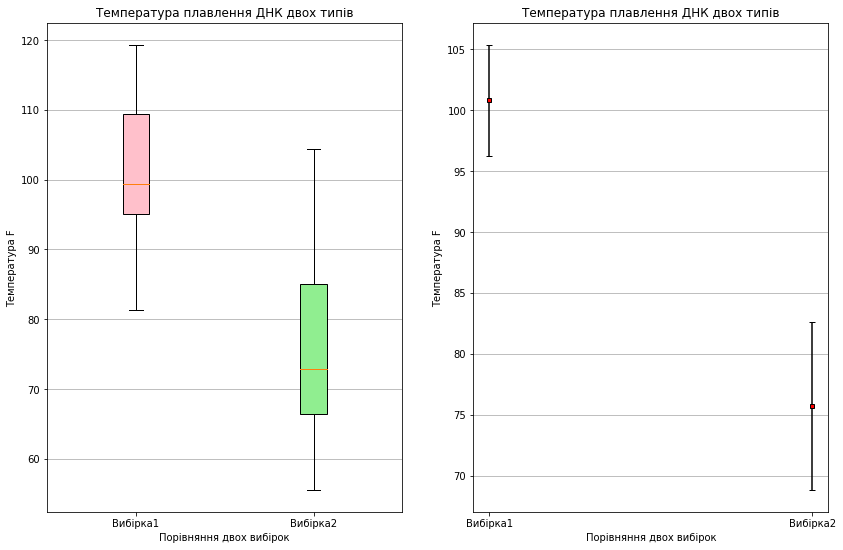

In [7]:
#будуємо графіки, boxplot з початкових даних array1, array2, довірчі інтервали з датафрейму df
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 9))

# графік boxplot
bplot1 = ax1.boxplot([array1, array2],
                      vert = True, # створюємо вертикальні бокси
                      patch_artist=True, # для краси заповнимо кольором бокси квантилей
                      labels=['Вибірка1', 'Вибірка2']) # використовується для завдання значень вибірок у випадку з boxplot

# графік довірчих інтервалів
bplot2 = ax2.errorbar(x=df.index, y=df['Mx'], yerr=df['interval'],\
                       color="black", capsize=3, marker="s", markersize=4, mfc="red", mec="black", fmt ='o')

# розфарбуємо boxplot
colors = ['pink', 'lightgreen']
for patch, color in zip(bplot1['boxes'], colors):
     patch.set_facecolor(color)
    
# додамо загальні для кожного з графіків дані
for ax in [ax1, ax2]:
     ax.yaxis.grid(True)
     ax.set_title('Температура плавлення ДНК двох типів')
     ax.set_xlabel('Порівняння двох вибірок')
     ax.set_ylabel('Температура F')
    
plt.show()

<h3>Завдання</h3>

Розрахуйте довірчий інтервал, ґрунтуючись на знанні t - розподілу для середнього значення температури плавлення ДНК у першого виду:

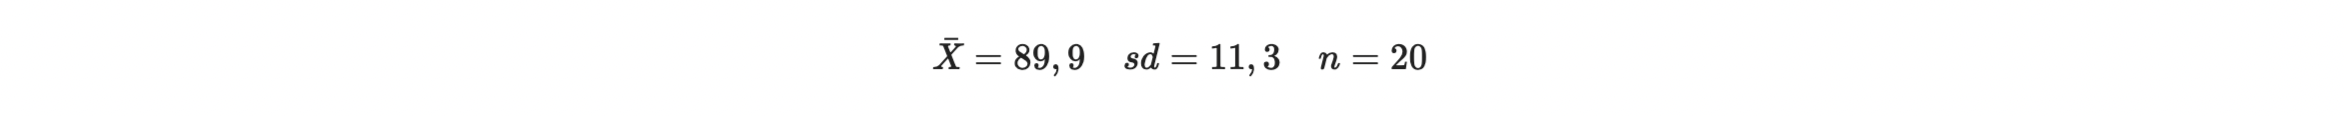

In [9]:
from scipy import stats
from math import sqrt

mean = 89.9
sd = 11.3
n = 20

# ступінь свободи
df = n - 1

# 95% довірчий інтервал
p = 0.95
alpha = 1-p

# стандартна помилка
se = sd/sqrt(n)

# ppf - Percent point function
# ділимо на два, тому що за замовчуванням функція вважає для одного кінця, а нам треба для двох
t_value = stats.t(df).ppf(1-(alpha/2))

# довірчий інтервал
сonfidence_interval = (mean-t_value*se, mean+t_value*se)
print('[%.2f; %.2f]' % сonfidence_interval)

[84.61; 95.19]


Перші премії Оскар за кращу чоловічу та жіночу роль були вручені у 1929 році. Дані гістограми демонструють розподіл віку переможців з 1929 по 2014 рік (100 чоловіків, 100 жінок). Використовуючи t - критерій перевірте, чи можна вважати відмінності, що спостерігаються у віці між кращими актрисами і акторами статистично достовірними. 

Середній вік чоловіків дорівнює 45, SD = 9. 

Середній вік жінок дорівнює 34, SD = 10.

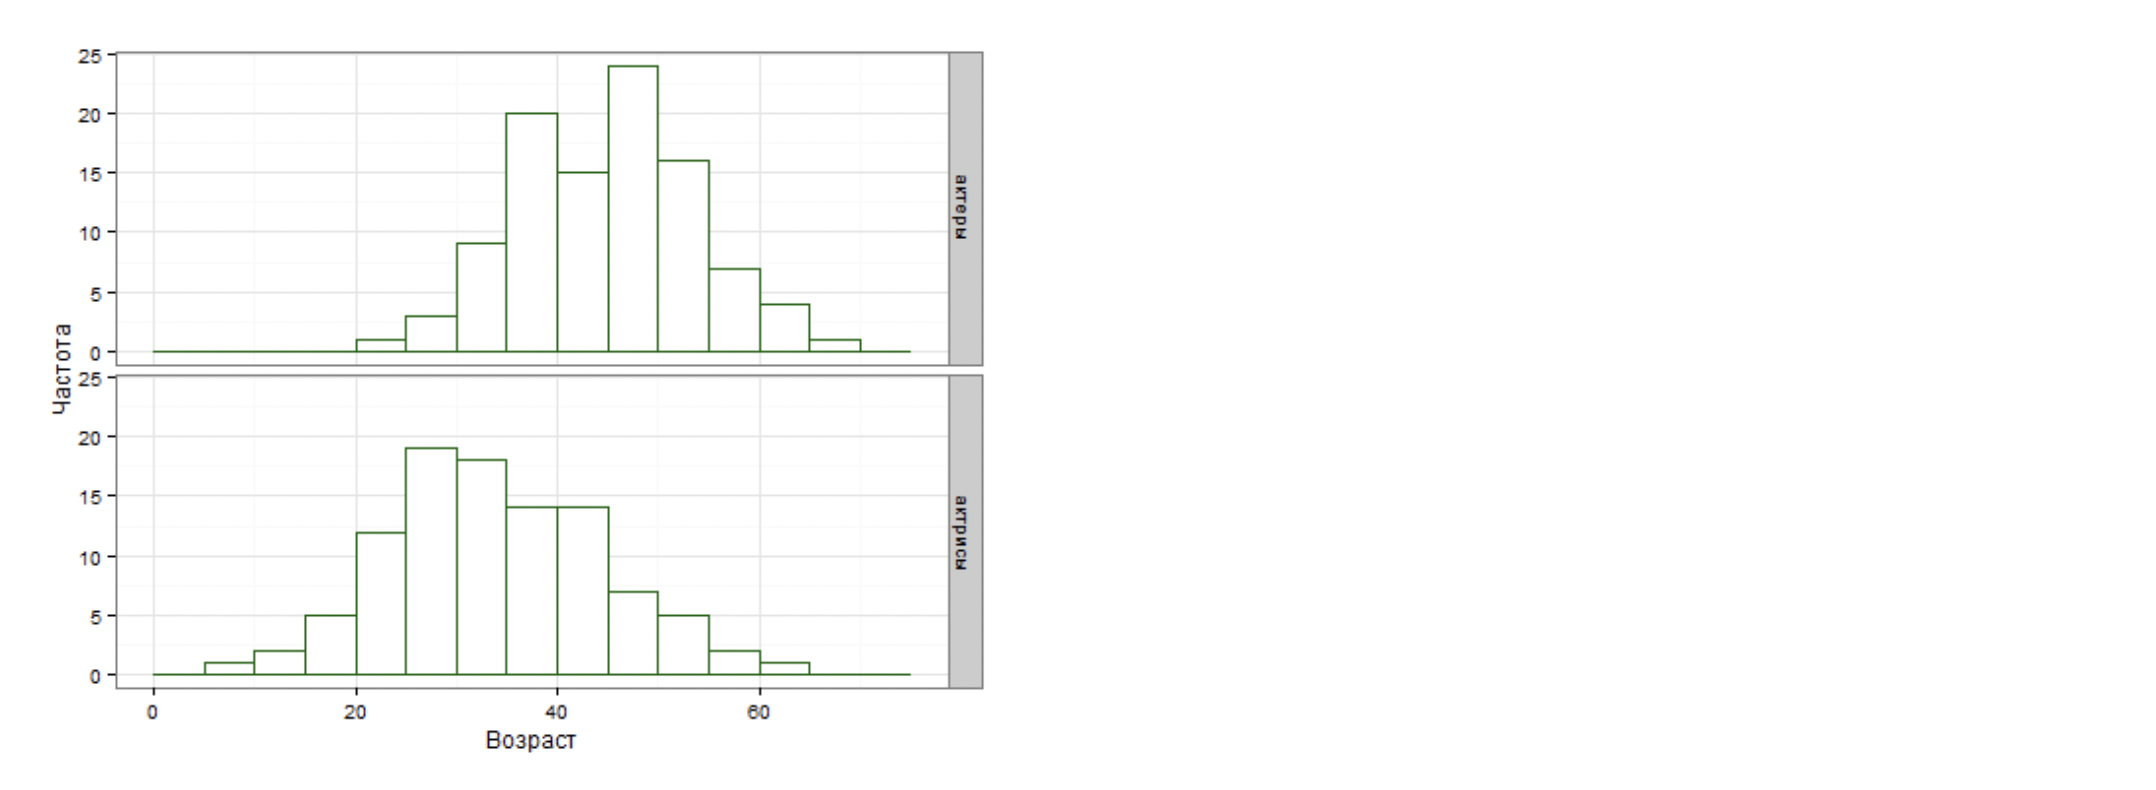

In [12]:
from scipy.stats import t
from numpy import sqrt

mean_m, mean_f = 45, 34
sd_m, sd_f = 9, 10
N = 100

se = sqrt((sd_m ** 2)/N + (sd_f ** 2)/N)
t_value = (mean_m - mean_f)/se

p = t.sf(t_value, N-2)
print(f'p={p}')
if p >= 0.05:
    print('Ми НЕ можемо відхилити нульову гіпотезу')
else:
     print('Ми можемо відхилити нульову гіпотезу')

p=5.328933875539173e-13
Ми можемо відхилити нульову гіпотезу
